<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/FruitsVGG16_MF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 26.98 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [21]:
train_path = "../content/Fruit-Images-Dataset/Training"
test_path = "../content/Fruit-Images-Dataset/Test"

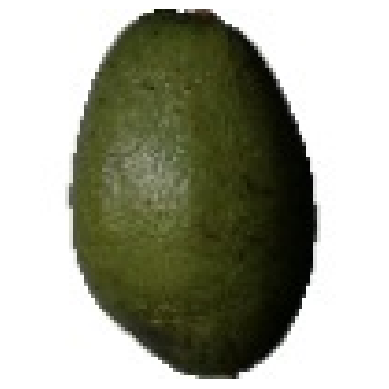

In [22]:
img = load_img(train_path + "/Avocado/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [23]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [24]:
numberOfClass = len(glob(train_path + "/*"))
numberOfClass

131

In [25]:
vgg = VGG16()

In [ ]:
print(vgg.summary())

In [27]:
print(type(vgg))

<class 'keras.src.engine.functional.Functional'>


In [28]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.src.engine.input_layer.InputLayer object at 0x7a84b7dbd870>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a84b7d99a20>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a84b7fd4df0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a84b7fd5090>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a85db132950>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a84b7d9a140>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a84b7d9b4c0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a84b7d9a7d0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a84b7d9a4a0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a84b7d9b880>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a84b7d9bd60>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a84b7d99de0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a84b7d9b490>, <keras.src.layers.convolutional.co

In [29]:
len(vgg_layer_list)

23

In [30]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [ ]:
print(model.summary())

In [ ]:
for layers in model.layers:
    layers.trainable = False

model.add(Dense(numberOfClass, activation = "softmax"))

print(model.summary())

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [35]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224))
batch_size = 32

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [36]:
hist = model.fit_generator(train_data,
                          steps_per_epoch = 1600 // batch_size,
                          epochs = 25,
                          validation_data = test_data,
                          validation_steps = 800 // batch_size)

Epoch 1/25


<ipython-input-36-f789e12a2eec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


50/50 [==============================] - 17s 238ms/step - loss: 3.6174 - accuracy: 0.3938 - val_loss: 1.5423 - val_accuracy: 0.6212
Epoch 2/25
50/50 [==============================] - 10s 193ms/step - loss: 0.9699 - accuracy: 0.7362 - val_loss: 1.0358 - val_accuracy: 0.7475
Epoch 3/25
50/50 [==============================] - 12s 235ms/step - loss: 0.5246 - accuracy: 0.8462 - val_loss: 0.7270 - val_accuracy: 0.8300
Epoch 4/25
50/50 [==============================] - 12s 236ms/step - loss: 0.2865 - accuracy: 0.9131 - val_loss: 0.5502 - val_accuracy: 0.8537
Epoch 5/25
50/50 [==============================] - 12s 237ms/step - loss: 0.2455 - accuracy: 0.9269 - val_loss: 0.9128 - val_accuracy: 0.7925
Epoch 6/25
50/50 [==============================] - 10s 206ms/step - loss: 0.1844 - accuracy: 0.9481 - val_loss: 0.5735 - val_accuracy: 0.8737
Epoch 7/25
50/50 [==============================] - 12s 242ms/step - loss: 0.1690 - accuracy: 0.9531 - val_loss: 0.6514 - val_accuracy: 0.8662
Epoch 8/25

In [37]:
model.save_weights("model_fruits360.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


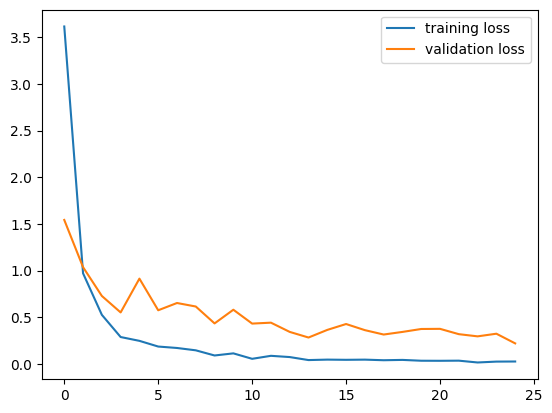

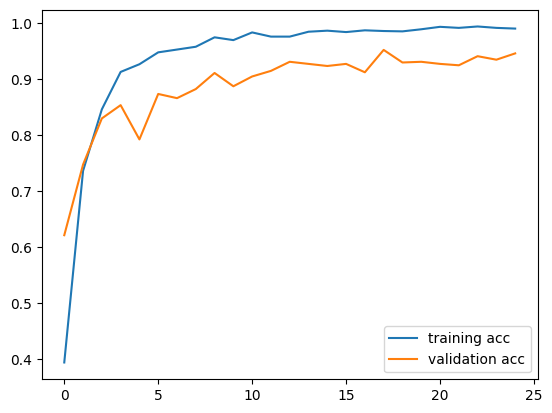

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [42]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "training loss")
plt.plot(hist.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "training acc")
plt.plot(hist.history["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()
plt.figure()

In [45]:
import json, codecs

with open("model_fruits360.json","w") as f:
    json.dump(hist.history,f)

In [46]:
with codecs.open("model_fruits360.json","r",encoding= "utf-8") as f:
    n = json.loads(f.read())

In [47]:
with codecs.open("model_fruits360.json","r",encoding= "utf-8") as f:

    n = json.loads(f.read())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


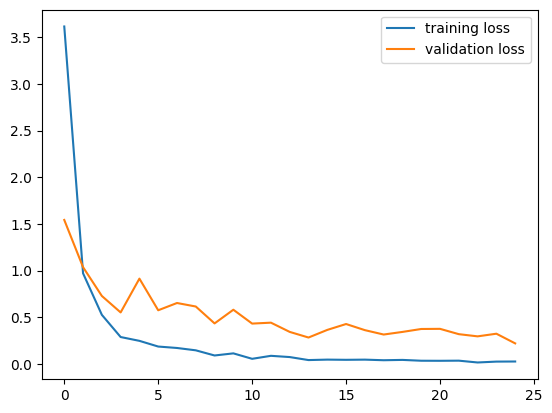

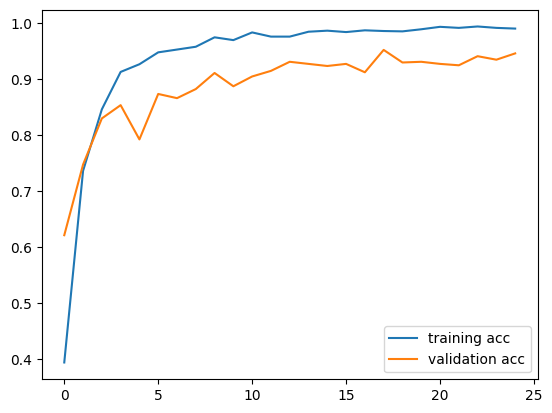

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
print(hist.history.keys())
plt.plot(n["loss"], label = "training loss")
plt.plot(n["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(n["accuracy"], label = "training acc")
plt.plot(n["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()
plt.figure()